In [87]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  # to keep genre info from filename
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [88]:
movies_df = movies_df.drop(columns=['movie_rated', 'release_date', 'review_url', 'genre_source'], errors='ignore')
movies_df = movies_df.rename(columns={
    'rating': 'imdb_rating'
})

movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836
1,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820
2,The Matrix,1999,2h 16min,Action; Sci-Fi;,8.7,1619761,4281
3,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58min,Action; Adventure; Drama;,8.8,1609165,5365
4,The Dark Knight Rises,2012,2h 44min,Action; Adventure;,8.4,1470329,2979


In [89]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [90]:
reviews_df = reviews_df.drop(columns=['date'], errors='ignore')
reviews_df = reviews_df.rename(columns={
    'rating': 'user_rating',
    'title': 'review_title'
})
import os
# Update the 'movie_name' column to remove the path and extension
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# lowercase for consistent matching
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()
reviews_df = reviews_df.drop(columns=['movie_name'], errors='ignore')
reviews_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane


In [92]:
# Step 1: Read the descriptions CSV
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1660642918.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


(1700, 10)

In [97]:
# Step 1: Read the overview CSV
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in overview_df
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.drop(columns=['description_x'], inplace=True)
movies_df = movies_df.rename(columns={'description_y': 'description'})


C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1032404013.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [99]:
movies_df.drop(columns=['overview_x'], inplace=True)
movies_df = movies_df.rename(columns={'overview_y': 'overview'})
movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description,overview
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,NaN,Batman raises the stakes in his war on crime. ...
1,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,NaN,In a post-apocalyptic world ravaged by feuding...
2,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,NaN,Batman raises the stakes in his war on crime. ...
3,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,NaN,In a post-apocalyptic world ravaged by feuding...
4,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820,inception,"In this mind-bending sci-fi thriller, a man ru...","Cobb, a skilled thief who commits corporate es..."


In [100]:
movies_df.shape

(2876, 10)

In [101]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")
movies_df.shape

Missing descriptions remaining: 156


(2876, 9)

In [102]:
movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,Batman raises the stakes in his war on crime. ...
1,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,In a post-apocalyptic world ravaged by feuding...
2,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,Batman raises the stakes in his war on crime. ...
3,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836,the dark knight,In a post-apocalyptic world ravaged by feuding...
4,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820,inception,"Cobb, a skilled thief who commits corporate es..."


In [103]:
movies_df = movies_df.drop_duplicates()
movies_df.shape


(1623, 9)

In [104]:
# Step 1: Drop duplicates based on name_clean and description (to avoid repeated identical rows)
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)

movies_df_unique.head()


,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Ben-Hur,1959,3h 32min,Adventure; Drama; History;,8.1,213444,443,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,1h 38min,Comedy; Drama; War;,7.9,43762,181,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,2h 35min,Action; Adventure; Drama;,8.5,1297718,2636,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,1h 33min,Animation; Adventure; Comedy;,7.3,198490,218,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,2h 7min,Drama; Sport;,6.9,31474,176,the rookie,Jim Morris never made it out of the minor leag...


In [105]:
movies_df_unique.shape

(1145, 9)

In [106]:

# lowercase for consistent matching
movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()

# Then merge or match
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [107]:

merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['name_clean'], axis =1)
merged_df.duplicated().any()
merged_df = merged_df.drop_duplicates()
merged_df.shape
merged_df = merged_df.dropna(subset=['description'])

print(merged_df.isnull().sum())
merged_df.shape

username            0
user_rating         0
helpful             0
total               0
review_title        0
review              0
movie_name_clean    0
year                0
run_length          0
genres              0
imdb_rating         0
num_raters          0
num_reviews         0
description         0
dtype: int64


(693135, 14)

In [108]:
# After cleaning user_rating if needed
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['user_rating'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

# Now drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['user_rating'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape


Number of nulls in 'user_rating': 78433


(614702, 14)

In [109]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime (e.g., "1h 43min" -> 103 minutes)
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'review_title', 'review', 'genres', 'movie_name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop duplicates 
    df = df.drop_duplicates()

    return df

merged_df = transform_merged_df(merged_df)
print(merged_df.dtypes)


username             object
user_rating         float64
helpful               int64
total                 int64
review_title         object
review               object
movie_name_clean     object
year                  int64
run_length            int64
genres               object
imdb_rating         float64
num_raters            int64
num_reviews           int64
description          object
dtype: object


In [110]:
# collaborative filtering
# memory based
# user based
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import random
sample_users = random.sample(list(merged_df['username'].unique()), 5000)
sample_movies = random.sample(list(merged_df['movie_name_clean'].unique()), 900)

merged_df_sample = merged_df[
    merged_df['username'].isin(sample_users) & merged_df['movie_name_clean'].isin(sample_movies)
]


# Create user-item matrix
user_item_matrix = merged_df_sample.pivot_table(index='username', columns='movie_name_clean', values='user_rating')

# Fill NaN with 0 (or fill with mean)
user_item_matrix_filled = user_item_matrix.fillna(0)


In [111]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [113]:
merged_df_sample.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description
27,erojas-47968,10.0,43,81,a human-monster of a movie,"maybe to be attached to that ""cloverfield"" mov...",10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
128,thomasdrufke,8.0,8,17,"unsettling, thrilling, and surprising",while i didn't see the original cloverfield un...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
162,brunamussi,1.0,2,3,what the hell did i just watched?,everything was fine and acceptable until the l...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
304,gazza2020,7.0,0,0,great film,this is a great film keeps you guessing all th...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."
327,bradenaw,8.0,0,0,a glaring issue,great movie until the last ten minutes. once s...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find..."


In [114]:

# Function to recommend movies to a user based on similar users
def recommend_user_based(user_id, top_n=5):
    if user_id not in user_similarity_df.index:
        return "User not found."

    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id).index

    # Get movies rated by similar users
    user_ratings = user_item_matrix.loc[user_id]
    unseen_movies = user_ratings[user_ratings.isnull()].index if user_ratings.isnull().any() else []

    recommendations = {}
    for movie in unseen_movies:
        total_score = 0
        sim_sum = 0
        for other_user in similar_users:
            rating = user_item_matrix.loc[other_user, movie]
            if not pd.isna(rating):
                similarity = user_similarity_df.loc[user_id, other_user]
                total_score += similarity * rating
                sim_sum += similarity
        if sim_sum > 0:
            recommendations[movie] = total_score / sim_sum

    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return sorted_recommendations[:top_n]


In [115]:
# Example: Recommend movies to user
recommend_user_based('CinemaClown', top_n=5)

'User not found.'

In [117]:
# Example: Recommend movies to user
recommend_user_based('thomasdrufke', top_n=5)

[('the godfather', 10.000000000000002),
 ('any given sunday', 10.0),
 ('days of thunder', 10.0),
 ('elizabeth', 10.0),
 ('empire of the sun', 10.0)]

In [118]:
#item based
# Compute cosine similarity between movies
item_similarity = cosine_similarity(user_item_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

# Function to recommend movies based on similar movies
def recommend_item_based(movie_name, top_n=5):
    if movie_name not in item_similarity_df.index:
        return "Movie not found."

    similar_items = item_similarity_df[movie_name].sort_values(ascending=False).drop(movie_name)
    return similar_items.head(top_n)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [119]:
# Example: Recommend movies similar to '10 things i hate about you'
recommend_item_based('10 things i hate about you', top_n=5)

movie_name_clean
no man's land    0.386695
she's the man    0.386695
the doors        0.362173
love actually    0.306016
glory road       0.273434
Name: 10 things i hate about you, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

# Train-Test Split
train_df, test_df = train_test_split(merged_df_sample, test_size=0.2, random_state=42)


In [121]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Create user-item matrices for train and test data
train_user_item_matrix = train_df.pivot_table(index='username', columns='movie_name_clean', values='user_rating')
test_user_item_matrix = test_df.pivot_table(index='username', columns='movie_name_clean', values='user_rating')


In [122]:
# Fill NaN values in the train and test matrices with 0
train_user_item_matrix_filled = train_user_item_matrix.fillna(0)
test_user_item_matrix_filled = test_user_item_matrix.fillna(0)

In [123]:
# User-Based Collaborative Filtering (Predictions)
# Compute cosine similarity between users for the train data
user_similarity_train = cosine_similarity(train_user_item_matrix_filled)
user_similarity_train_df = pd.DataFrame(user_similarity_train, index=train_user_item_matrix_filled.index, columns=train_user_item_matrix_filled.index)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [124]:
# Function to predict ratings using user-based CF
def predict_user_based(user_id, movie_name, top_n=5):
    if user_id not in user_similarity_train_df.index:
        return 0
    
    if movie_name not in train_user_item_matrix.columns:
        return 0  # If movie is not in the training set, return 0
    
    similar_users = user_similarity_train_df[user_id].sort_values(ascending=False).drop(user_id).index
    user_ratings = train_user_item_matrix.loc[user_id]
    if movie_name in user_ratings.index and not pd.isna(user_ratings[movie_name]):
        return user_ratings[movie_name]  # If the user has already rated the movie, return the rating
    
    total_score = 0
    sim_sum = 0
    for other_user in similar_users:
        rating = train_user_item_matrix.loc[other_user, movie_name]
        if not pd.isna(rating):
            similarity = user_similarity_train_df.loc[user_id, other_user]
            total_score += similarity * rating
            sim_sum += similarity
    
    if sim_sum > 0:
        return total_score / sim_sum
    return 0

# Function to predict ratings using item-based CF
def predict_item_based(user_id, movie_name, top_n=5):
    if movie_name not in item_similarity_train_df.index:
        return 0  # If movie is not in the training set, return 0
    
    similar_items = item_similarity_train_df[movie_name].sort_values(ascending=False).drop(movie_name)
    user_ratings = train_user_item_matrix.loc[user_id]
    if movie_name in user_ratings.index and not pd.isna(user_ratings[movie_name]):
        return user_ratings[movie_name]  # If the user has already rated the movie, return the rating
    
    total_score = 0
    sim_sum = 0
    for similar_movie in similar_items.index:
        rating = user_ratings[similar_movie]
        if not pd.isna(rating):
            similarity = item_similarity_train_df.loc[movie_name, similar_movie]
            total_score += similarity * rating
            sim_sum += similarity
    
    if sim_sum > 0:
        return total_score / sim_sum
    return 0



In [125]:
# Step 3: Item-Based Collaborative Filtering (Predictions)
# Compute cosine similarity between items for the train data
item_similarity_train = cosine_similarity(train_user_item_matrix_filled.T)
item_similarity_train_df = pd.DataFrame(item_similarity_train, index=train_user_item_matrix_filled.columns, columns=train_user_item_matrix_filled.columns)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [127]:
# Step 4: Evaluate RMSE for User-Based CF
user_based_predictions = []
user_based_actual = []
for index, row in test_df.iterrows():
    user_id = row['username']
    movie_name = row['movie_name_clean']
    actual_rating = row['user_rating']
    
    predicted_rating = predict_user_based(user_id, movie_name)
    user_based_predictions.append(predicted_rating)
    user_based_actual.append(actual_rating)

user_based_rmse = np.sqrt(mean_squared_error(user_based_actual, user_based_predictions))
print(f"User-Based Collaborative Filtering (cosine) RMSE: {user_based_rmse:.4f}")


User-Based Collaborative Filtering (cosine) RMSE: 5.4885


In [128]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Ensure both lists are aligned and exclude any failed predictions
filtered_predictions = []
filtered_actuals = []

for pred, actual in zip(user_based_predictions, user_based_actual):
    if pred is not None and not np.isnan(pred):
        filtered_predictions.append(pred)
        filtered_actuals.append(actual)

# Now compute MAE
user_cosine_mae = mean_absolute_error(filtered_actuals, filtered_predictions)
print(f" User-Based CF (Cosine) MAE: {user_cosine_mae:.4f}")


 User-Based CF (Cosine) MAE: 4.1515


In [129]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Step 1: Filter test set to contain only valid users and movies
valid_users = train_user_item_matrix.index
valid_movies = train_user_item_matrix.columns
test_df_valid = test_df[test_df['username'].isin(valid_users) & test_df['movie_name_clean'].isin(valid_movies)]

# Step 2: Define prediction functions with error handling for missing data
def predict_user_based(user_id, movie_name, top_n=5):
    if user_id not in user_similarity_train_df.index:
        return 0  # If user is not found in training set, return 0
    if movie_name not in train_user_item_matrix.columns:
        return 0  # If movie is not found in the training set, return 0
    
    similar_users = user_similarity_train_df[user_id].sort_values(ascending=False).drop(user_id).index
    user_ratings = train_user_item_matrix.loc[user_id]
    if movie_name in user_ratings.index and not pd.isna(user_ratings[movie_name]):
        return user_ratings[movie_name]
    
    total_score = 0
    sim_sum = 0
    for other_user in similar_users:
        rating = train_user_item_matrix.loc[other_user, movie_name]
        if not pd.isna(rating):
            similarity = user_similarity_train_df.loc[user_id, other_user]
            total_score += similarity * rating
            sim_sum += similarity
    
    if sim_sum > 0:
        return total_score / sim_sum
    return 0

def predict_item_based(user_id, movie_name, top_n=5):
    if movie_name not in item_similarity_train_df.index:
        return 0  # If movie is not in the training set, return 0
    
    similar_items = item_similarity_train_df[movie_name].sort_values(ascending=False).drop(movie_name)
    user_ratings = train_user_item_matrix.loc[user_id]
    if movie_name in user_ratings.index and not pd.isna(user_ratings[movie_name]):
        return user_ratings[movie_name]
    
    total_score = 0
    sim_sum = 0
    for similar_movie in similar_items.index:
        rating = user_ratings[similar_movie]
        if not pd.isna(rating):
            similarity = item_similarity_train_df.loc[movie_name, similar_movie]
            total_score += similarity * rating
            sim_sum += similarity
    
    if sim_sum > 0:
        return total_score / sim_sum
    return 0

# Step 3: Evaluate RMSE for Item-Based CF
item_based_predictions = []
item_based_actual = []
for index, row in test_df_valid.iterrows():
    user_id = row['username']
    movie_name = row['movie_name_clean']
    actual_rating = row['user_rating']
    
    predicted_rating = predict_item_based(user_id, movie_name)
    item_based_predictions.append(predicted_rating)
    item_based_actual.append(actual_rating)

item_based_rmse = np.sqrt(mean_squared_error(item_based_actual, item_based_predictions))
print(f"Item-Based Collaborative Filtering RMSE: {item_based_rmse}")


Item-Based Collaborative Filtering RMSE: 3.1965340097150174


In [130]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Pivot table: users as rows, movies as columns
user_item_matrix = merged_df_sample.pivot_table(index='username', columns='movie_name_clean', values='user_rating')

# Save a copy with NaNs for prediction
user_item_matrix_nan = user_item_matrix.copy()

# Fill NaNs with 0 for similarity computation
user_item_matrix_filled = user_item_matrix.fillna(0)


In [131]:
# Compute Pearson correlation between users (pairwise)
user_similarity_pearson = user_item_matrix.T.corr(method='pearson')


In [132]:
def predict_user_based_pearson(user_id, movie_name):
    if movie_name not in user_item_matrix.columns or user_id not in user_item_matrix.index:
        return np.nan

    # Users who rated the movie
    movie_ratings = user_item_matrix[movie_name]
    similar_users = movie_ratings[movie_ratings.notna()].index

    # Similarity scores
    similarities = user_similarity_pearson.loc[user_id, similar_users]

    # Ratings from similar users
    ratings = user_item_matrix.loc[similar_users, movie_name]

    # Mean center the ratings
    mean_user_ratings = user_item_matrix.loc[similar_users].mean(axis=1)
    rating_diff = ratings - mean_user_ratings

    # Prediction
    numerator = (similarities * rating_diff).sum()
    denominator = np.abs(similarities).sum()
    
    if denominator == 0:
        return np.nan

    user_mean = user_item_matrix.loc[user_id].mean()
    prediction = user_mean + numerator / denominator
    return prediction


In [133]:
from sklearn.model_selection import train_test_split

# Ensure not to test on cold-start users/movies
valid_users = user_item_matrix.index
valid_movies = user_item_matrix.columns

filtered_df = merged_df_sample[merged_df_sample['username'].isin(valid_users) & merged_df_sample['movie_name_clean'].isin(valid_movies)]

train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)


In [134]:
user_based_predictions = []
user_based_actuals = []

for index, row in test_df.iterrows():
    user_id = row['username']
    movie_name = row['movie_name_clean']
    actual_rating = row['user_rating']
    
    pred = predict_user_based_pearson(user_id, movie_name)
    
    if not np.isnan(pred):
        user_based_predictions.append(pred)
        user_based_actuals.append(actual_rating)

# Compute RMSE
if user_based_predictions:
    rmse_user_pearson = np.sqrt(mean_squared_error(user_based_actuals, user_based_predictions))
    print(f" User-Based (Pearson) RMSE: {rmse_user_pearson:.4f}")
else:
    print(" No valid predictions were made.")


 User-Based (Pearson) RMSE: 0.9961


In [135]:
from sklearn.metrics import mean_absolute_error

user_based_mae = mean_absolute_error(user_based_actuals, user_based_predictions)
print(f"User-Based CF (Pearson) MAE: {user_based_mae:.4f}")


User-Based CF (Pearson) MAE: 0.6935


In [136]:
item_based_mae = mean_absolute_error(item_based_actual, item_based_predictions)
print(f"Item-Based CF (Cosine) MAE: {item_based_mae:.4f}")


Item-Based CF (Cosine) MAE: 2.1183


In [137]:
# model based
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Filter required columns
ratings_df = merged_df_sample[['username', 'movie_name_clean', 'user_rating']].dropna()

# 2. Encode usernames and movie names as indices
user_ids = ratings_df['username'].astype("category").cat.codes
movie_ids = ratings_df['movie_name_clean'].astype("category").cat.codes
ratings_df['user_index'] = user_ids
ratings_df['movie_index'] = movie_ids

# 3. Create user-item matrix
num_users = ratings_df['user_index'].nunique()
num_movies = ratings_df['movie_index'].nunique()
user_item_matrix = np.zeros((num_users, num_movies))

for row in ratings_df.itertuples():
    user_item_matrix[row.user_index, row.movie_index] = row.user_rating

# 4. Train-Test split
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# 5. Mean center the matrix
mean_user_ratings = np.true_divide(user_item_matrix.sum(1), (user_item_matrix != 0).sum(1))
mean_user_ratings = np.nan_to_num(mean_user_ratings)
normalized_matrix = user_item_matrix - mean_user_ratings[:, np.newaxis]
normalized_matrix[user_item_matrix == 0] = 0  # not normalize unrated entries

# 6. Apply SVD
U, sigma, Vt = np.linalg.svd(normalized_matrix, full_matrices=False)
k = 50  # number of latent factors
sigma = np.diag(sigma[:k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]

# 7. Reconstruct the ratings
predicted_ratings = np.dot(np.dot(U_k, sigma), Vt_k) + mean_user_ratings[:, np.newaxis]

# 8. Evaluate with RMSE
actual = []
predicted = []

for row in test_df.itertuples():
    u = row.user_index
    m = row.movie_index
    actual_rating = row.user_rating
    predicted_rating = predicted_ratings[u, m]
    
    actual.append(actual_rating)
    predicted.append(predicted_rating)

svd_rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f" Model-Based CF (SVD) RMSE: {svd_rmse:.4f}")


 Model-Based CF (SVD) RMSE: 0.8463


In [138]:
from sklearn.metrics import mean_absolute_error
model_based_mae = mean_absolute_error(actual, predicted)
print(f"Model-Based CF (SVD) MAE: {model_based_mae:.4f}")


Model-Based CF (SVD) MAE: 0.4038


<Figure size 800x400 with 0 Axes>

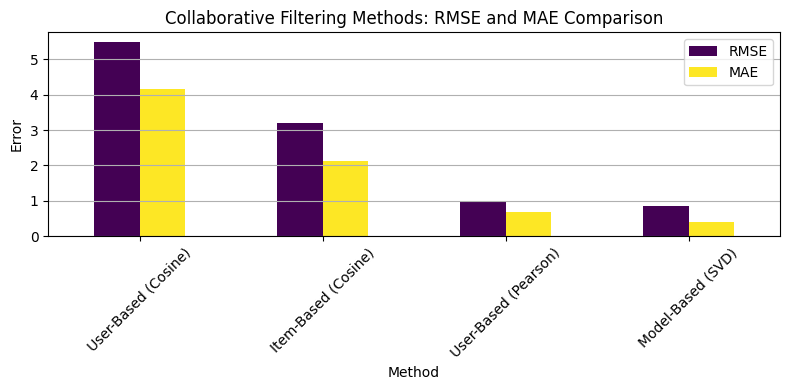

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
methods = [
    'User-Based (Cosine)', 
    'Item-Based (Cosine)', 
    'User-Based (Pearson)', 
    'Model-Based (SVD)'
]

rmse_scores = [5.4885, 3.1965, 0.9961, 0.8463]
mae_scores = [4.1515, 2.1183, 0.6935, 0.4038]

# Create DataFrame for easy plotting
import pandas as pd
df_scores = pd.DataFrame({
    'Method': methods,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Plot
plt.figure(figsize=(8,4))
df_scores.set_index('Method')[['RMSE', 'MAE']].plot(kind='bar', figsize=(8,4), colormap='viridis')
plt.title('Collaborative Filtering Methods: RMSE and MAE Comparison')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [141]:
import pandas as pd

# Data
methods = [
    'User-Based CF (Cosine)', 
    'Item-Based CF (Cosine)', 
    'User-Based CF (Pearson)', 
    'Model-Based CF (SVD)'
]

rmse_scores = [5.4885, 3.1965, 0.9961, 0.8463]
mae_scores = [4.1515, 2.1183, 0.6935, 0.4038]

# Create DataFrame
results_table = pd.DataFrame({
    'Method': methods,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})


In [78]:
!pip install tabulate


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [142]:
from tabulate import tabulate

# Table
print(tabulate(results_table, headers='keys', tablefmt='psql'))


+----+-------------------------+--------+--------+
|    | Method                  |   RMSE |    MAE |
|----+-------------------------+--------+--------|
|  0 | User-Based CF (Cosine)  | 5.4885 | 4.1515 |
|  1 | Item-Based CF (Cosine)  | 3.1965 | 2.1183 |
|  2 | User-Based CF (Pearson) | 0.9961 | 0.6935 |
|  3 | Model-Based CF (SVD)    | 0.8463 | 0.4038 |
+----+-------------------------+--------+--------+
